In [2]:
import numpy as np
import pandas as pd

# Numpy and Pandas

## Numpy arrays

How are they similar to Python lists?
 - We can access elements by position
 - We can slice to access range of elements
 - We can technically use a for loop on an array, although not recommended

How do they differ from Python lists?
 - Each element in np.array __designed__ be same type
 - Many convenient methods and functions for math
 - Arrays can be multi-dimensional (slightly different than list of lists)
 - Support __vectorized operations__
 
### Vectorized operations

 - __MATH__
  * add (+= is inplace version)
  * subtract
  * multiply (**element-wise vs. matrix**)
  * divide
  * exponeniate
 - __LOGICAL__
  * &: and
  * |: or
  * ~: not
  * these will only work as we expect on boolean arrays (if arrays are numeric, it will do bitwise operation instead)
  * use np.logical_and(a,b), np.logical_or(a,b), np.logical_not(a,b) instead
 - __COMPARISON__
  * \>, >=
  * <, <=
  * ==
  * !=

### Index arrays

You can use boolean array of same length to index array

In [99]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 1, 2])

In [104]:
print(a+b)
print(a-b)
print(a*b)
print(a/b)
print(a**b)
print(np.logical_and(a,b))
print(np.logical_and(a>2,a<4))

[2 4 4 6]
[0 0 2 2]
[1 4 3 8]
[ 1.  1.  3.  2.]
[ 1  4  3 16]
[ True  True  True  True]
[False False  True False]


In [8]:
np.dot(a,b)

16

## Pandas Series

Have useful methods (describe()) that arrays do not. 

Most importantly, has an __index__

Like a cross between Python list and dict. Can think of index as 'keys'. 

Indices have types as well!

## Indexing

 - `loc` on indexes
 - `iloc` on positions (only takes integers)
 - `ix` tries to do `loc` but falls back on `iloc` if label is not in index

In [23]:
s = pd.Series(0, index=[49,48,47,46,45, 1, 2, 3, 4, 5])
s

49    0
48    0
47    0
46    0
45    0
1     0
2     0
3     0
4     0
5     0
dtype: int64

In [25]:
s.loc[:4]

49    0
48    0
47    0
46    0
45    0
1     0
2     0
3     0
4     0
dtype: int64

In [26]:
s.iloc[:3]

49    0
48    0
47    0
dtype: int64

In [28]:
s.iloc[:6]

49    0
48    0
47    0
46    0
45    0
1     0
dtype: int64

### Vectorized operations

How do these differ from numpy?

In [29]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s1 + s2

a    11
b    22
c    33
d    44
dtype: int64

In [31]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
s1 + s2

a    31
b    12
c    43
d    24
dtype: int64

In [32]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
s1 + s2

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64

In [33]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64

What if we want a different value instead of NaN?

In [34]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
s1.add(s2, fill_value = 0)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64

### apply()

Treats Series as a list and uses function on all elements

Exactly like Python's map() but works on Series instead of lists

In [11]:
s = pd.Series(['NUMerical PYthon',
              'Science Kitty LEARN',
              'Boostrap AGGregation',
              'Galvanize University'])

import string
def acronomize(s):
    translator = str.maketrans({key: '' for key in string.ascii_lowercase})
    return s.translate(translator).replace(' ','')

s.apply(acronomize)

0      NUMPY
1    SKLEARN
2       BAGG
3         GU
dtype: object

## Numpy arrays (multi-dimensional)

Why make 2D array vs. array of arrays?
 - More memory efficient
 - Indexing different: `a[1,3]` versus `a[1][3]`
 - All functions (`mean()`, `std()`, etc.) operate on arrays, not array of arrays

In [59]:
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [68]:
# note shape of results!

print(ridership[1, 3])

print(ridership[1:3, 3:5])

print(ridership[1, :])

print(ridership[1, :, np.newaxis])

print(ridership[1, np.newaxis, :])

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]
[[1478]
 [3877]
 [3674]
 [2328]
 [2539]]
[[1478 3877 3674 2328 2539]]


In [63]:
print(ridership[0, :] + ridership[1, :])
print(ridership[:, 0] + ridership[:, 1])

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [60]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
a + brs[qk]

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

### Which axis?

How can we think of multi-dimensional arrays?

 __columns__: axis=0
 __rows__: axis=1

In [69]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))

45
[12 15 18]
[ 6 15 24]


## Pandas DataFrames

A dict of Series. Series already have indices (which become row index) and keys of dict become column index.

In [51]:
employment = pd.read_csv('employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv('female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv('male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv('life_expectancy.csv', index_col='Country')
gdp = pd.read_csv('gdp_per_capita.csv', index_col='Country')

### 'JOIN' on DataFrames

In [75]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})
subway_df.head()

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564


In [76]:
weather_df = pd.DataFrame({
    'date': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})
weather_df.head()

,date,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5


In [73]:
subway_df.merge(weather_df,
               left_on=['DATEn', 'hour', 'latitude', 'longitude'],
               right_on=['date', 'hour', 'latitude', 'longitude'],
               how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,date,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,05-01-11,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,05-02-11,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,05-03-11,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,05-04-11,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,05-05-11,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,05-01-11,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,05-02-11,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,05-03-11,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,05-04-11,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,05-05-11,0,30.01,0,48.9,15.0


### Concatenating

In [3]:
s1 = pd.Series([0,1], index=['a', 'b'])
s2 = pd.Series([2,3,4], index=['c', 'd', 'e'])
s3 = pd.Series([5,6], index=['f','g'])

In [4]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [5]:
pd.concat([s1,s2,s3],axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [7]:
s4 = pd.concat([s1*5, s3])

In [8]:
pd.concat([s1,s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [9]:
pd.concat([s1,s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


## Pandas plotting

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

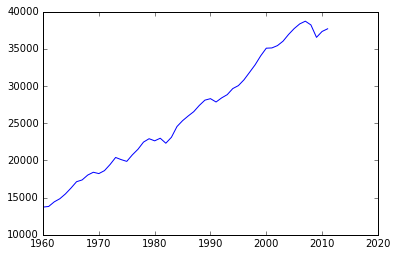

In [57]:
plt.plot(gdp.loc['United States'])

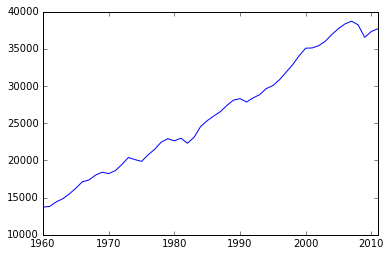

In [58]:
gdp.loc['United States'].plot()

In [77]:
subway_df = pd.read_csv('nyc_subway_weather.csv')

In [80]:
by_loc = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
by_loc.head()

,latitude,longitude,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,40.576152,-73.975925,9.659049e+06,8.641132e+06,403.896175,325.956284,10.032787,2.907104,0.715847,0.010929,...,29.972568,0.229508,63.383607,5.553005,0.006284,29.972568,63.383607,5.553005,40.603489,-73.958763
1,40.576298,-73.968523,8.306897e+06,6.646823e+06,526.697297,419.562162,9.989189,2.951351,0.708108,0.010811,...,29.973297,0.227027,63.375135,5.517838,0.006216,29.973297,63.375135,5.517838,40.603489,-73.958763
2,40.577961,-73.961806,4.552910e+07,4.612408e+07,1950.295699,1930.483871,10.000000,2.935484,0.709677,0.010753,...,29.973118,0.225806,63.394086,5.531720,0.006183,29.973118,63.394086,5.531720,40.603489,-73.958763
3,40.589547,-73.974295,7.268214e+06,7.961334e+06,485.382353,362.941176,10.164706,2.905882,0.705882,0.011765,...,29.971176,0.200000,63.650588,5.630588,0.006118,29.971176,63.650588,5.630588,40.603489,-73.958763
4,40.590867,-73.797011,6.477945e+06,5.994957e+06,500.725610,374.628049,10.097561,2.951220,0.719512,0.024390,...,29.981098,0.195122,61.721341,9.945122,0.002744,29.981098,61.721341,9.945122,40.660004,-73.844849


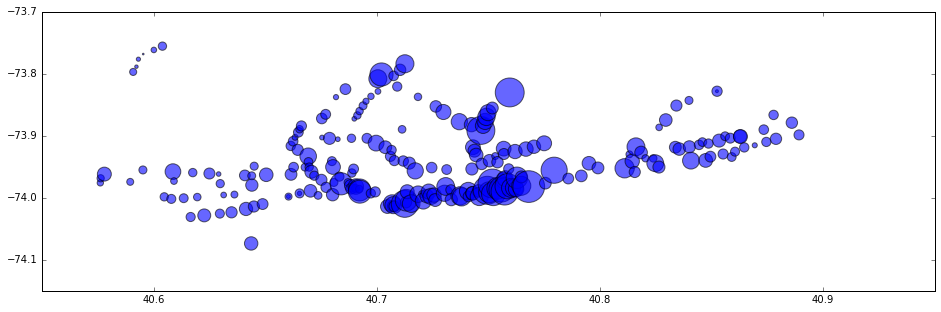

In [97]:
plt.figure(figsize = [16,5])
plt.scatter(by_loc['latitude'], by_loc['longitude'], s=by_loc['ENTRIESn_hourly']*0.1, alpha = 0.6)

In [12]:
from bs4 import BeautifulSoup

import requests

# Web scraping

## HTML (hypertext markup language)

- HTML element usually consists of a start tag and end tag, with the content inserted in between:

```html
<!DOCTYPE html>
<html>
<body>

<h1>My First Heading</h1>
<p>My first paragraph.</p>

</body>
</html>
```

- All HTML elements can have attributes
- Attributes provide additional information about an element
- Attributes are always specified in the start tag
- Attributes usually come in name/value pairs like: name="value"


## CSS (cascading style sheets)



Test in console:
```javascript
$('<your CSS selector>')
```

Common selectors:
```css
/* ID
#id

/* CSS class
.class

/* HTML tag
tag

/* select elements with that attribute set to given value
[attribute='value']

/* select <other> elements with that attribute
other[attribute]

/* touching means select elements with BOTH
.class.class

/* space means select .class elements that are CHILDREN of div tags
div .class 

/* > means select direct CHILDREN
.module > h2

/* p elements directly AFTER h2
h2 + p

/* elements with sister class that are siblings to (and follow) element with id=link1 
#link1 ~ .sister
```

## BeautifulSoup

```python
find()
find_all()
# looks through a tag’s descendants and retrieves all descendants that match your filters
# name
# id = '<>' (could be True to find all with tags with id)
# href = '<>'
# class_ = '<>'

select()
# use CSS selector

```

In [13]:
query = 'data scientist'
url = "http://www.indeed.com/jobs?q=%s" % query.replace(' ', '+')
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [17]:
[t.text for t in soup.find_all(class_='location')]

['San Francisco, CA 94102',
 'Portland, OR 97210',
 'San Francisco, CA 94111',
 'Holmdel, NJ',
 'Seattle, WA 98103 (Green Lake - Wallingford area)',
 'San Francisco, CA 94107 (South Of Market area)',
 'San Francisco, CA 94102 (Downtown area)',
 'San Francisco, CA',
 'Berkeley, CA 94710',
 'Mountain View, CA',
 'San Francisco, CA',
 'California',
 'Berkeley, CA',
 'Bellevue, WA 98004',
 'Emeryville, CA']

In [28]:
[t['href'] for t in soup.find_all(class_='jobtitle turnstileLink')]

['/pagead/clk?mo=r&ad=-6NYlbfkN0CiRNM7CVr8YueLFKlzwbFWI0o7IjV438l4sVrvKZ0fliTfoNv_ONF5FvJKNaJe41NVsSiyV36H0O8XBMkJORokVIvsRKLhgochRHmTz3B8CaZbnb9JUtkSxkLKCE1EJXf-EfA4yPw-U_L76Ula9LmuqRhMUvlfJe0LxUSwThnEOgqTs2djRLNNr7O5m7sqJkaUdS4MIGwxNKcH0hpJhAy-dM00IWnQRvcyo26NkjoOjR-xtwRUp6W9q-r6AYBcaZmL-NDNb7ug24WCnZnDBU7N7ET5z5i7GKF_2okR6oS4J3pANHWxX2WVZMhMFl_cf2N-gsCjNugt0eLDUZJKmwgRcENtD5jziZOD85TxukMZ8j0EnyLVKk7P4fwaWm4QmtY9PmKcOqt5BJ37TVd38asstELO9mpskOtdwoZ3JcX97IGqfMDUcOzeH86TUbPoYitCISAKJh2_Y66P5kNAh-ygpl3O4YsSMQM=&p=1&sk=&fvj=0',
 '/pagead/clk?mo=r&ad=-6NYlbfkN0D5MS76FVkDD7TfZqP8XNRM5cXVWwRIeyBmyMA22TrEzhV2CGNxEi-O4GPmbzU8m_r2PJO2Gw9PT1ZtKR0EsZcTe9zk4pIrKIrq7hjOwff7M9OZTXlFKkiq5jx-2oq7ePxgWhcQZGDWkHg6Xl622BIJoFsQRjOmgAwwlGUhzic1eC0owTwwJeixe5Sd8POQbJ6O3y_YbmwfPWydLKVUW4dg4JGayNCXYLZd391jWUFugKwlFr0b4CLzuk-4P7vGJMelkACQawlQBg1BcMYpdvJVw-RNZhirV8O10uCtU3r9EgxJy5udGsVWz3_Ccu9-Qr1M31oaVtXcpyZpOavZddDCYUkUbmI9IIgUvyAErmt2tJKkyXts4kXR8n8GkoaD4R2k4sX29Z_X66UAL1CtZGJpomrnlO6gD5u76sRNgZblJXgaawBL--U